In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
Comparison = pd.read_csv("Output Data/Comparison.csv")

In [3]:
#ids_to_remove = Comparison.loc[Comparison["Distance"] >= 3.5, "ID (CME)"].unique()
#Comparison = Comparison[~Comparison["ID (CME)"].isin(ids_to_remove)]
Comparison

,ID (CME),ID (Dino),x (CME),y (CME),z (CME),x (Dino),y (Dino),z (Dino),t,t_start (CME),t_start (Dino),FI (CME),FI (Dino),Track Length (CME),Track Length (Dino),Distance,Multi ID (Dino),Multi Distance (Dino)
0,1.0,339.0,316.79,151.61,34.960,315.22787,151.61403,36.871914,1.0,1.0,1.0,175.250,341.0,99.0,74.0,2.468943,339,2.47
1,1.0,339.0,316.91,151.95,35.180,315.39215,151.58618,36.012856,2.0,1.0,1.0,218.140,352.5,99.0,74.0,1.769147,339,1.77
2,1.0,339.0,316.99,151.34,35.330,315.74518,150.99426,36.582730,3.0,1.0,1.0,218.740,363.0,99.0,74.0,1.799568,339,1.80
3,1.0,339.0,317.09,152.22,35.240,315.99518,151.59639,35.915910,4.0,1.0,1.0,264.620,378.0,99.0,74.0,1.429816,339,1.43
4,1.0,339.0,316.93,151.54,35.000,316.20465,151.08432,35.901264,5.0,1.0,1.0,247.410,361.0,99.0,74.0,1.243404,339,1.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77853,6297.0,2272.0,516.34,265.71,146.049,511.44010,264.81714,158.931610,99.0,98.0,5.0,31.553,254.4,2.0,65.0,13.811874,NaN,NaN
77854,6298.0,12436.0,548.65,294.81,151.196,553.20935,291.60052,151.607530,98.0,98.0,98.0,61.880,262.5,2.0,1.0,5.590867,NaN,NaN
77855,6298.0,7838.0,548.09,294.26,149.239,543.01750,310.91324,147.997650,99.0,98.0,56.0,59.079,232.0,2.0,15.0,17.452840,NaN,NaN
77856,6299.0,1192.0,509.90,300.23,153.892,507.39066,297.66830,157.095060,98.0,98.0,1.0,64.359,220.9,2.0,49.0,4.808190,1192,4.81


In [4]:
#a = Comparison[Comparison["Track Length (CME)"]==Comparison["Track Length (Dino)"] and Comparison["ID (CME)"]]
d = Comparison["ID (CME)"].unique()


In [5]:
M_comp = Comparison.to_numpy()
ID_vec = defaultdict(list)

for ID in M_comp:
    ID_vec[ID[0]].append(ID)

for ID_val in ID_vec:
    ID_vec[ID_val] = np.array(ID_vec[ID_val]) 

ID_list = np.zeros((len(ID_vec),5), dtype=object)

In [46]:
for i, ID in enumerate(ID_vec):
    ID_val = ID_vec[ID]
    CME_ID = np.unique(ID_val[:,0])
    Dino_IDs = np.unique(ID_val[:,1])
    TL_CME = np.unique(ID_val[:,13])
    TL_Dino = np.unique(ID_val[:,14])

    ID_list[i][0] = CME_ID
    ID_list[i][1] = Dino_IDs
    ID_list[i][2] = TL_CME
    ID_list[i][3] = TL_Dino
    
    if len(Dino_IDs) == 1 and TL_CME == TL_Dino:
    #if np.all(ID_val[:,15]) < 3.5:
        ID_list[i][4] = True
    else:
        ID_list[i][4] = False

In [48]:
Sum = pd.DataFrame(ID_list, columns = ["ID (CME)","ID (Dino)", "Track Length (CME)", "Track Length (Dino)", "True Match"])
Sum.to_csv("Output Data/Sum.csv")

In [41]:
track_lengths = np.array([row[2][0] for row in ID_list])
mask_true = np.array([row[4] for row in ID_list])
bins = np.arange(0, 110, 10)

counts, _ = np.histogram(track_lengths, bins)

counts_true, _ = np.histogram(track_lengths[mask_true], bins)

labels = np.array(("0-9","10-19","20-29","30-39","40-49","50-59","60-69","70-79","80-89","90-99"))

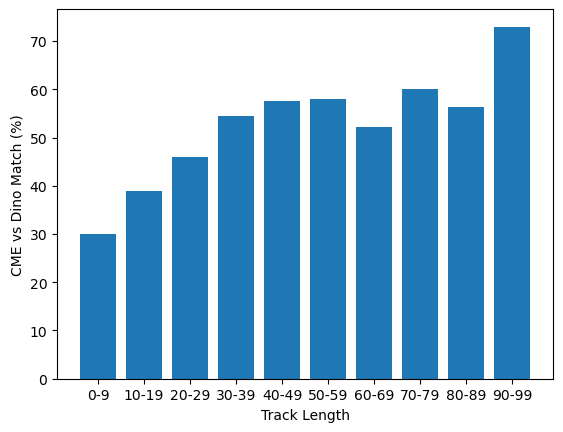

In [43]:
plt.bar(labels,100*counts_true/counts)
plt.xlabel("Track Length")
plt.ylabel("CME vs Dino Match (%)")
plt.show()

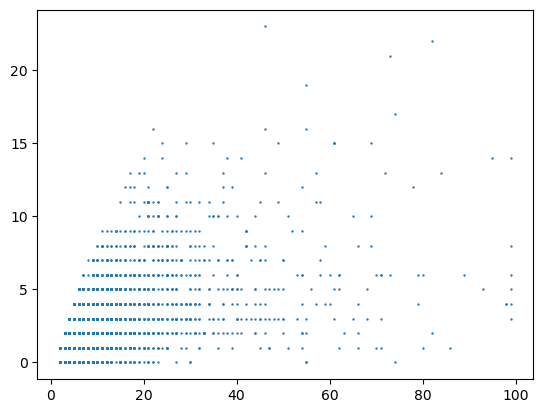

In [10]:
selected = ID_list[ID_list[:, 4] == False]
breaks = np.array([len(x) for x in selected[:,1]])-1
plt.scatter(selected[:,2],breaks, s = 0.5)
plt.show()

